<a href="https://colab.research.google.com/github/colesmcintosh/multi-agent-architecture-for-workflows/blob/main/Multi_Agent_Architecture_for_Company_Workflows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Agent Architecture for Company Workflows

## Concept Overview

This notebook demonstrates a simplified multi-agent architecture using LangGraph, a Python library for building stateful, multi-actor workflows. The goal is to model a company's task management system where different departments (Marketing, Programming, Project Management, and Documentation) handle specific tasks in a coordinated manner.

### Key Features:
- **Coordinator Agent**: Acts as the entry point, assigning tasks to the appropriate department.
- **Department-Specific Agents**:
  - **Marketing**: Handles market research and campaign design.
  - **Programming**: Manages code development and quality assurance.
  - **Project Management**: Oversees scheduling and risk assessment.
  - **Documentation**: Produces technical documentation.
- **Review Agent**: Ensures final quality control before task completion.
- **Linear Workflow**: Tasks flow from the coordinator to department agents, then to review, in a straightforward, easy-to-follow manner.

This architecture is designed to be approachable, with a single conditional routing step based on the department, making it easy to understand and extend.

## Installation

Before running the code, we need to install the required dependencies. Run the following cell to install `langgraph` and `typing-extensions`.

In [ ]:
!pip install langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.5/43.5 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.4/142.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 223.6/223.6 kB 13.5 MB/s eta 0:00:00


## Code Implementation

The following code implements the multi-agent architecture. It defines the state, agents, routing logic, and graph structure.

In [ ]:
import operator
from typing import Annotated, Sequence
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

# Define a simplified state structure
class AgentState(TypedDict):
    aggregate: Annotated[list, operator.add]  # Accumulated results from agents
    department: str  # Determines which department workflow to follow

# Core Agents
def coordinator_agent(state: AgentState):
    """Agent Label: Coordinator
    Purpose: Initial task distribution"""
    print(f'Coordinator Agent: Starting with {state["aggregate"]}')
    return {"aggregate": ["Task_Started"]}

# Marketing Agents
def market_research_agent(state: AgentState):
    """Agent Label: MarketResearcher
    Purpose: Analyze market trends"""
    print(f'Market Research Agent: Analyzing {state["aggregate"]}')
    return {"aggregate": ["Market_Data"]}

def campaign_design_agent(state: AgentState):
    """Agent Label: CampaignDesigner
    Purpose: Create marketing campaigns"""
    print(f'Campaign Design Agent: Designing {state["aggregate"]}')
    return {"aggregate": ["Campaign_Plan"]}

# Programming Agents
def code_dev_agent(state: AgentState):
    """Agent Label: Developer
    Purpose: Write and test code"""
    print(f'Development Agent: Coding {state["aggregate"]}')
    return {"aggregate": ["Code_Delivered"]}

def qa_agent(state: AgentState):
    """Agent Label: QualityAssurance
    Purpose: Test code quality"""
    print(f'QA Agent: Testing {state["aggregate"]}')
    return {"aggregate": ["QA_Results"]}

# Project Management Agents
def pm_scheduling_agent(state: AgentState):
    """Agent Label: ProjectScheduler
    Purpose: Manage timelines"""
    print(f'PM Scheduling Agent: Planning {state["aggregate"]}')
    return {"aggregate": ["Schedule_Created"]}

def risk_assessment_agent(state: AgentState):
    """Agent Label: RiskAssessor
    Purpose: Identify project risks"""
    print(f'Risk Assessment Agent: Evaluating {state["aggregate"]}')
    return {"aggregate": ["Risk_Report"]}

# Documentation Agent
def tech_writer_agent(state: AgentState):
    """Agent Label: TechnicalWriter
    Purpose: Create documentation"""
    print(f'Tech Writer Agent: Documenting {state["aggregate"]}')
    return {"aggregate": ["Tech_Docs"]}

# Final Review Agent
def review_agent(state: AgentState):
    """Agent Label: Reviewer
    Purpose: Final quality check"""
    print(f'Review Agent: Validating {state["aggregate"]}')
    return {"aggregate": ["Final_Result"]}

# Simplified Routing Function
def route_department(state: AgentState) -> str:
    """Routing Logic: Department Selection
    Labels:
    - 'to_marketing': Route to marketing department
    - 'to_programming': Route to programming department
    - 'to_project_management': Route to project management department
    - 'to_documentation': Route to documentation department
    - 'to_review': Default to review if no department specified"""
    if state["department"] == "marketing":
        return "to_marketing"
    elif state["department"] == "programming":
        return "to_programming"
    elif state["department"] == "project_management":
        return "to_project_management"
    elif state["department"] == "documentation":
        return "to_documentation"
    return "to_review"

# Build the simplified multi-agent graph
builder = StateGraph(AgentState)

# Register all agents
builder.add_node(coordinator_agent)
builder.add_node(market_research_agent)
builder.add_node(campaign_design_agent)
builder.add_node(code_dev_agent)
builder.add_node(qa_agent)
builder.add_node(pm_scheduling_agent)
builder.add_node(risk_assessment_agent)
builder.add_node(tech_writer_agent)
builder.add_node(review_agent)

# Define a linear workflow structure
builder.add_edge(START, "coordinator_agent")

# Add single conditional routing for departments
builder.add_conditional_edges(
    "coordinator_agent",
    route_department,
    {
        "to_marketing": "market_research_agent",
        "to_programming": "code_dev_agent",
        "to_project_management": "pm_scheduling_agent",
        "to_documentation": "tech_writer_agent",
        "to_review": "review_agent"
    }
)

# Connect department-specific flows in a linear fashion
builder.add_edge("market_research_agent", "campaign_design_agent")
builder.add_edge("campaign_design_agent", "review_agent")
builder.add_edge("code_dev_agent", "qa_agent")
builder.add_edge("qa_agent", "review_agent")
builder.add_edge("pm_scheduling_agent", "risk_assessment_agent")
builder.add_edge("risk_assessment_agent", "review_agent")
builder.add_edge("tech_writer_agent", "review_agent")

# Final edge to end
builder.add_edge("review_agent", END)

# Compile the simplified multi-agent graph
multi_agent_graph = builder.compile()

## Graph Visualization

Below is the visual representation of the multi-agent workflow

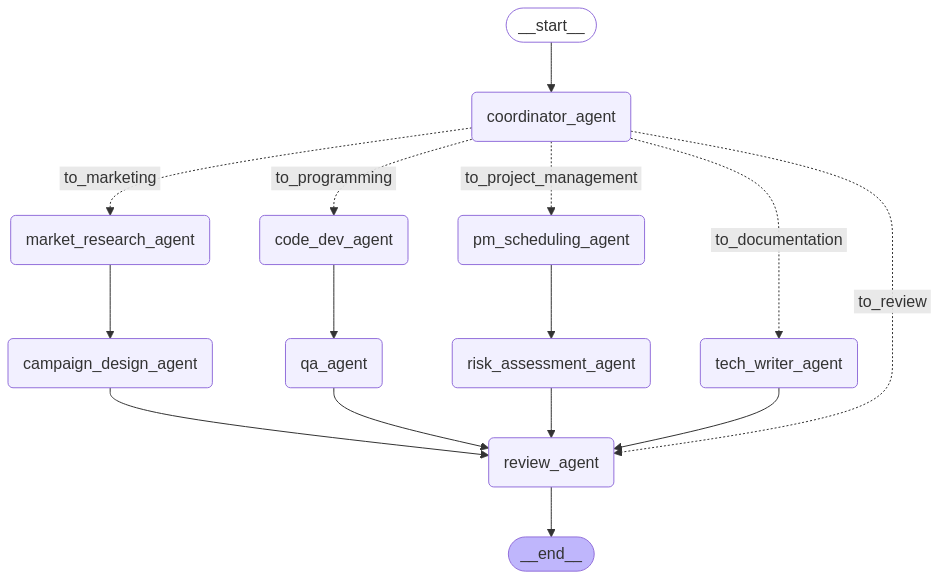

In [ ]:
from IPython.display import Image, display

display(Image(multi_agent_graph.get_graph().draw_mermaid_png()))

## Running the Multi-Agent Graph: Example

This example demonstrates how to run the compiled `multi_agent_graph` for a specific workflow. The graph is designed to handle tasks across multiple departments (marketing, programming, project management, and documentation) with conditional routing based on priority and project stage.

In this example, we will run the graph for a **high-priority marketing task** starting in the **planning stage**. The initial state is configured to route the task through the marketing department's workflow, which includes the `market_research_agent` and `campaign_design_agent`, before proceeding to the `review_agent` for final validation. The `priority` and `stage` variables will influence the routing decisions as defined in the graph's conditional edges.

The output will show the final state, including the `aggregate` list of results from each agent and the updated `stage` of the project.

In [ ]:
# Example: Running the multi-agent graph for a high-priority marketing task
initial_state = {
    "aggregate": [],              # Start with an empty aggregate list
    "department": "marketing",    # Route to the marketing department
    "priority": "high",           # High priority task
    "stage": "planning"           # Initial stage of the project
}

# Invoke the graph with the initial state
result = multi_agent_graph.invoke(initial_state)

# Print the final result
print("Final Result:", result)

Coordinator Agent: Starting with []
Market Research Agent: Analyzing ['Task_Started']
Campaign Design Agent: Designing ['Task_Started', 'Market_Data']
Review Agent: Validating ['Task_Started', 'Market_Data', 'Campaign_Plan']
Final Result: {'aggregate': ['Task_Started', 'Market_Data', 'Campaign_Plan', 'Final_Result'], 'department': 'marketing'}


## Conclusion and Practical Applications

This simplified multi-agent architecture provides a clear and manageable framework for a company to coordinate tasks across multiple departments. Here’s how it can be used in a real-world scenario:

### Practical Use Cases:
1. **Task Automation**:
   - A company can use this system to automate task assignment. For example, when a new project is initiated, the `coordinator_agent` can automatically route tasks to the appropriate department based on the project type (e.g., a marketing campaign, software development, or documentation update).
   
2. **Workflow Standardization**:
   - The linear flow ensures that each department follows a standardized process (e.g., marketing always involves research and design, programming always includes QA). This consistency improves efficiency and reduces errors.

3. **Scalability**:
   - The architecture is easy to extend. A company can add new departments or agents by defining new functions and updating the `route_department` logic. For instance, adding a "Sales" department would involve creating new agents and adding a new condition in the routing function.

4. **Monitoring and Debugging**:
   - The print statements in each agent make it easy to track the workflow’s progress. In a production environment, these could be replaced with logging mechanisms to monitor task execution and identify bottlenecks.

### Potential Enhancements:
- **Integration with Real Systems**: Replace the print statements with actual task implementations (e.g., the `market_research_agent` could call an API to gather market data, or the `code_dev_agent` could trigger a CI/CD pipeline).
- **User Interface**: Build a front-end interface where users can input the department and initial task data, then visualize the workflow as it progresses.
- **Error Handling**: Add error-handling mechanisms to manage failures in any agent, ensuring the workflow can recover gracefully.

This architecture serves as a foundation for building more complex systems while remaining approachable for teams new to multi-agent workflows. It demonstrates how to coordinate tasks across departments in a structured, automated way, paving the way for more advanced automation and collaboration tools.